<center><h1 style="color: Red;background-color:Yellow">Time Series Forcasting with sunspot data</h1></center>

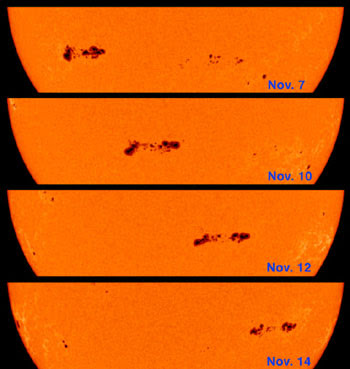

<h4 style="color: #731768;">
 Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity.heir number varies according to the approximately 11-year solar cycle.<br/><br/>
Individual sunspots or groups of sunspots may last anywhere from a few days to a few months, but eventually decay. Sunspots expand and contract as they move across the surface of the Sun, with diameters ranging from 16 km (10 mi) to 160,000 km (100,000 mi). Larger sunspots can be visible from Earth without the aid of a telescope. They may travel at relative speeds, or proper motions, of a few hundred meters per second when they first emerge<br/><br/>
 
In this notebook I will creating a base forecasting model and advanced forecassting models for doing time series analysis
* Base model use the concept of shifting
* Advanced model use the concept of ARIMA and SARIMA
</h4>




In [ ]:
import warnings
warnings.filterwarnings('ignore')

<h2 style="background-color: steelblue;">Importing the Libraries</h2>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="background-color: steelblue;">Loading the dataset

In [ ]:
data = pd.read_csv('../input/new2021/new (2).csv')

In [ ]:
data.head(2)

In [ ]:
data.columns

In [ ]:
data.drop(labels = ['Unnamed: 0'],axis = 1,inplace =True)

<h2 style="background-color: steelblue;">Statistical Description

In [ ]:
data.describe()

In [ ]:
data['Date']=pd.to_datetime(data['Date']) #Converting date into datetime object

In [ ]:
data_new = data.set_index(data['Date']) #Setting the date column as index

In [ ]:
data_new1 = data_new.drop(labels =['Date'],axis = 1) #Deleting the data column

<h2 style="background-color: steelblue;">Visualizing the data

In [ ]:
fig = plt.figure(figsize = (10,5))
data_new1['Monthly Mean Total Sunspot Number'].plot(style = 'k.')

<h2 style="background-color: steelblue;">Visualizing the sunspot in 2019

In [ ]:
data_new1['2019'].resample('M').mean().plot(kind='bar')

<h2 style="background-color: steelblue;">Quater-Wise Resampling the data

In [ ]:
data_q = data_new1.resample('q').mean()

In [ ]:
data_q.head()

<h2 style="background-color: steelblue;">Function for checking whether the series is stationary or not

<h4 style="color: #731768;">
    
A time series with a trend is called non-stationary.

An identified trend can be modeled. Once modeled, it can be removed from the time series dataset. This is called detrending the time series.

If a dataset does not have a trend or we successfully remove the trend, the dataset is said to be trend stationary.
    
</h4>

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(data):
    result = adfuller(data)
    labels =['ADF Tesr Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(data_q)

In [ ]:
data_q.plot()

<h2 style="background-color: steelblue;">BASE MODEL

In [ ]:
base_data = data_q.copy()

In [ ]:
base_data['Shifted_Monthly Mean Total Sunspot Number'] = base_data['Monthly Mean Total Sunspot Number'].shift(1)

In [ ]:
base_data[['Monthly Mean Total Sunspot Number','Shifted_Monthly Mean Total Sunspot Number']].plot(figsize=(12,8))

<h2 style="background-color: steelblue;">Actual value vs Modelled Value

In [ ]:
base_data[['Monthly Mean Total Sunspot Number','Shifted_Monthly Mean Total Sunspot Number']]['2018':].plot(figsize=(12,8))

In [ ]:
base_data = base_data.dropna()
from sklearn.metrics import mean_squared_error
print('Mean Squared Error: '+str(mean_squared_error(base_data['Monthly Mean Total Sunspot Number'],base_data['Shifted_Monthly Mean Total Sunspot Number'])))

<center><h2 style="background-color: steelblue;">Advanced Models</center>

<h4 style="color: #731768;">
    <center>Autocorrelation and Partial Autocorrelation</center><br/><br/>


 Identification of an Auto Regression model is often best done with the PACF.
* For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.<br/><br/>


Identification of an MA model is often best done with the ACF rather than the PACF


* For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

</h4>

<h2 style="background-color: steelblue;">AutoCorrelation Plot

In [ ]:
fig = plt.figure(figsize = (10,10))
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_q)
plt.show()

In this plot we can see the line enters the dotted region when the lag is lesser than 5 so we can take any value from 0 to 4 for p. I choose p to be 2 (**p=2**)

<h2 style="background-color: steelblue;">Auto-Correlation and Partial-Correlation Graphs

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_q,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_q,lags=40,ax=ax2)


In Partial Autocorrelation Graph after the second second vertical line there is sudden cutoff which makes the q to be 2 (**q=2**)

d should be either 0 or 1 or 2. I choose d as 0 (**d=0**)

<h2 style="background-color: steelblue;">ARIMA Model

<h4 style="color: #731768;">
In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.<br/><br/>
    

The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.The I (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). The purpose of each of these features is to make the model fit the data as well as possible.

Non-seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters p, d, and q are non-negative integers, p is the order (number of time lags) of the autoregressive model, d is the degree of differencing (the number of times the data have had past values subtracted), and q is the order of the moving-average model. Seasonal ARIMA models are usually denoted ARIMA(p,d,q)(P,D,Q)m, where m refers to the number of periods in each season, and the uppercase P,D,Q refer to the autoregressive, differencing, and moving average terms for the seasonal part of the ARIMA model.
    </h4>

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(data_q,order=(2,0,2))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
data_q['forecast']=model_fit.predict(start=1000,end=1500,dynamic=True)
data_q[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))

<h2 style="background-color: steelblue;">Actual value vs Modelled Value

In [ ]:
pred = data_q[data_q.forecast.notna()]
pred[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))

<h2 style="background-color: steelblue;">Seasonal ARIMA Model

In [ ]:
model=sm.tsa.statespace.SARIMAX(data_q['Monthly Mean Total Sunspot Number'],order=(2, 0, 2),seasonal_order=(2,0,2,6)) #seasonal_order is (p,d,q,seasonal_value) In this case I'm considering it as 6
results=model.fit()

In [ ]:
results.summary()

In [ ]:
data_q['forecast']=results.predict(start=1000,end=1084,dynamic=True)
data_q[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))

<h2 style="background-color: steelblue;">Actual value vs Modelled Value

In [ ]:
pred = data_q[data_q.forecast.notna()]
pred[['Monthly Mean Total Sunspot Number','forecast']].plot(figsize=(12,8))

 <h2 style="background-color: steelblue;">Thats all for this notebook....Thanks for your valuable time....If you like the content please upvote it:)